## Лабораторная №5. Задание 1

In [31]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

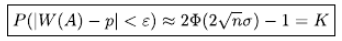

1. Моделирование случайного события A - ожидание автобуса\
T - случайная величина, распределенная по логнормальному закону\
M[T] = 10 минут - среднее время ожидания автобуса\
σ[T] = 3 минута - отклонение от среднего времени ожидания автобуса\

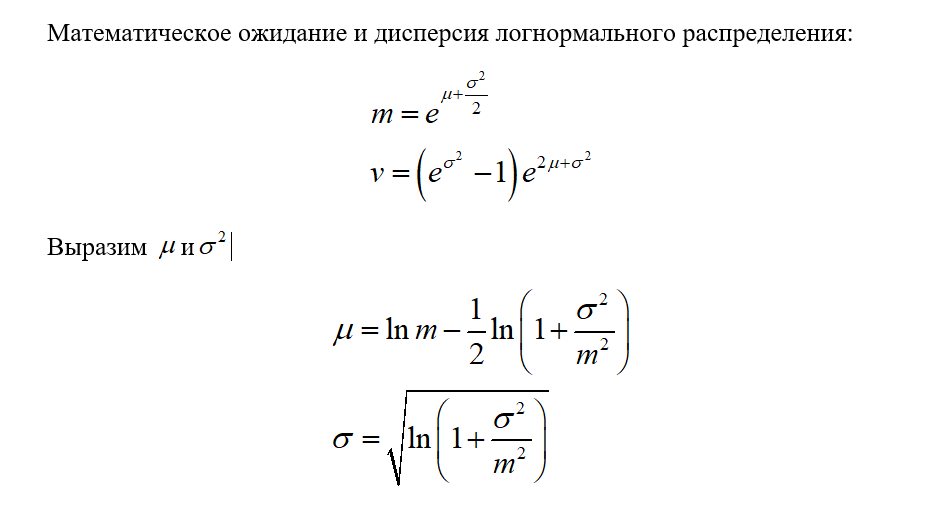

Логнормальный закон распределения. Определение статистической вероятности

In [32]:
mean_T = 5
std_T = 3

mean_norm = np.log(mean_T) - 0.5 * np.log(1 + (std_T**2)/(mean_T**2))
std_norm = np.sqrt(np.log(1 + (std_T**2)/(mean_T**2)))

T_values = stats.lognorm.rvs(s=std_norm, scale=np.exp(mean_norm), size=10)

W_A = np.mean(T_values < 5)

print("T_values:", T_values)
print(f"Статистическая вероятность W(A) = {W_A:.2f}")

T_values: [3.95300505 2.41165784 1.55028987 5.404578   1.98753784 8.53630313
 2.62320713 1.85146681 2.67947986 5.52154241]
Статистическая вероятность W(A) = 0.70


Оценка вероятности отклонения частоты на eps = 0.1

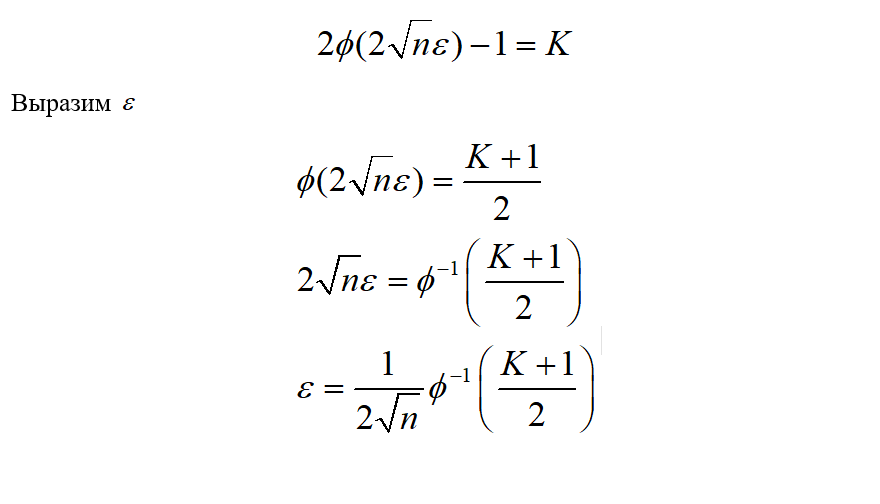
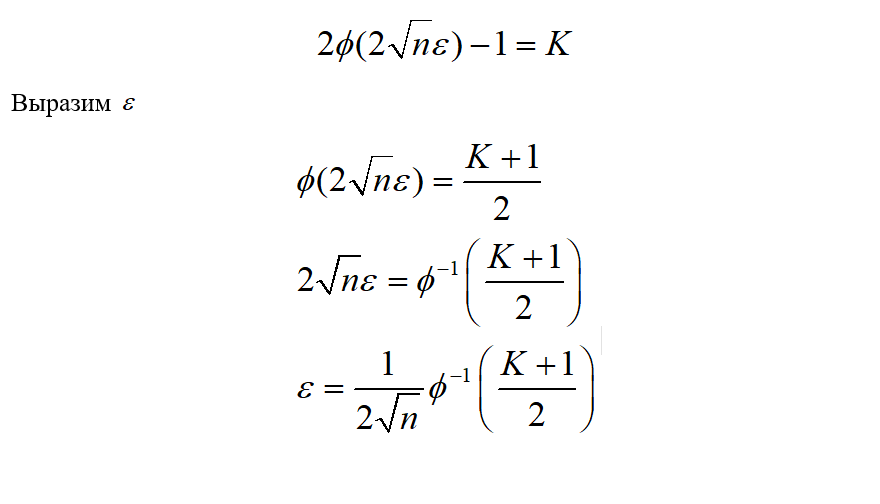

In [33]:
n = 10
known_eps = 0.1
K = 2 * stats.norm.cdf(2 * np.sqrt(n) * known_eps) - 1
print(f"K = {K}, при eps = {known_eps}")

known_K = 0.47
eps = stats.norm.ppf((known_K + 1) / 2) / (2 * np.sqrt(n))
print(f"eps = {eps}, при K = {known_K}")


K = 0.4729107431344619, при eps = 0.1
eps = 0.09929646949536533, при K = 0.47


Примерно в 47% случаев условие |W(A) - p| < eps будет выполняться

Проверка K в N = 100 экспериментов

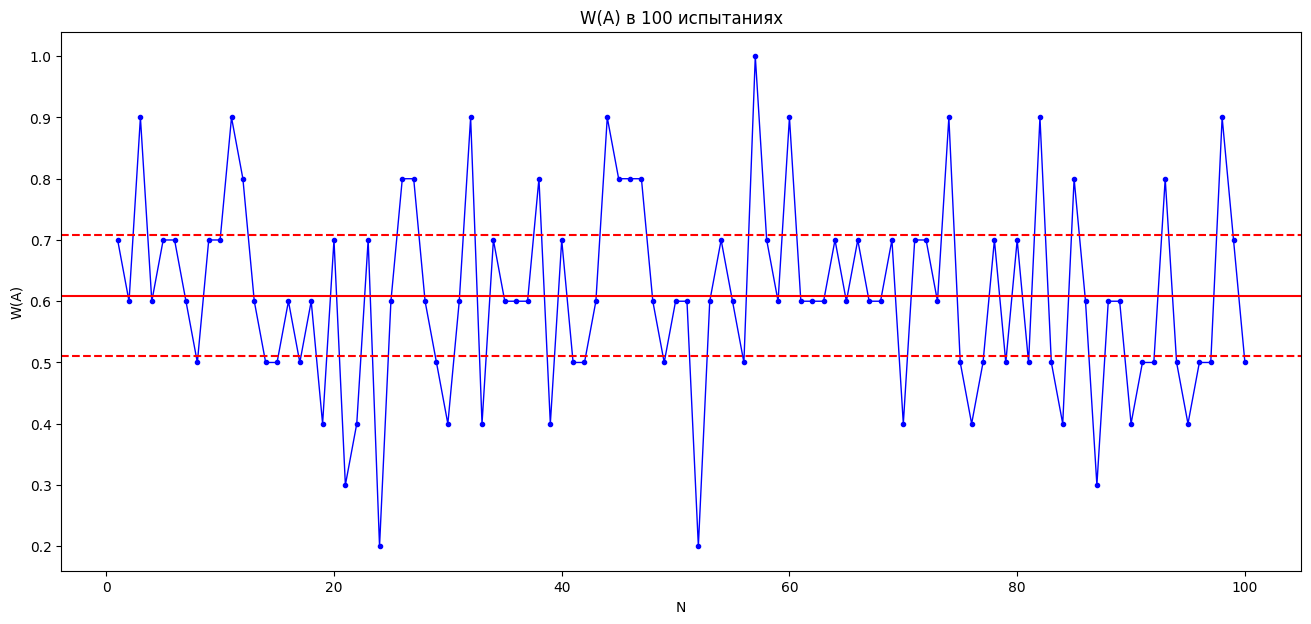

Количество значений, которые попали в диапазон p ± eps: 48


In [34]:
N = 100

tests = []
tests_number = np.arange(1, N+1)
for i in range(N):
    T_values = stats.lognorm.rvs(s=std_norm, scale=np.exp(mean_norm), size=10)
    W_A = np.mean(T_values < 5)
    tests.append(W_A)

p = stats.lognorm.cdf(5, s=std_norm, scale=np.exp(mean_norm))

successful_tests = np.sum((tests >= (p - eps)) & (tests <= (p + eps)))

plt.figure(figsize=[16, 7])
plt.title("W(A) в 100 испытаниях")
plt.plot(tests_number, tests, 'b-o', linewidth=1, markersize=3)
plt.xlabel("N")
plt.ylabel("W(A)")
plt.axhline(p, color='red')
plt.axhline(p+eps, ls='--', color='red')
plt.axhline(p-eps, ls='--', color='red')
plt.show()

print(f"Количество значений, которые попали в диапазон p ± eps: {successful_tests}")

Наш исходный процент попадания в диапазон p ± eps = 47%. Исходя из результата проведения 100 испытаний мы получили близкое к исходному значение,\
что говорит нам о справедливости следствия теоремы Ляпунова (Центральной предельной теоремы)

Количество испытаний при eps = 0.1, K = 0.9

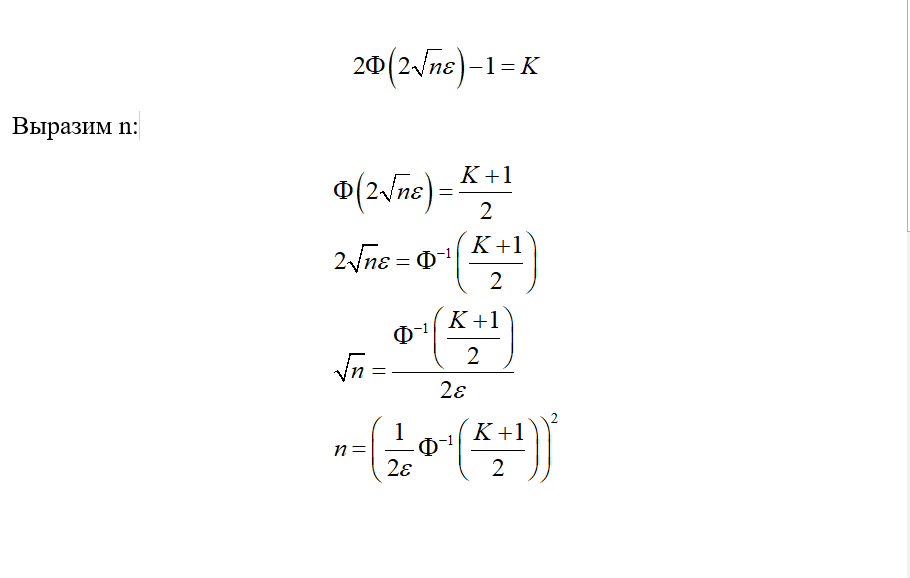

Полученное количество испытаний = 67


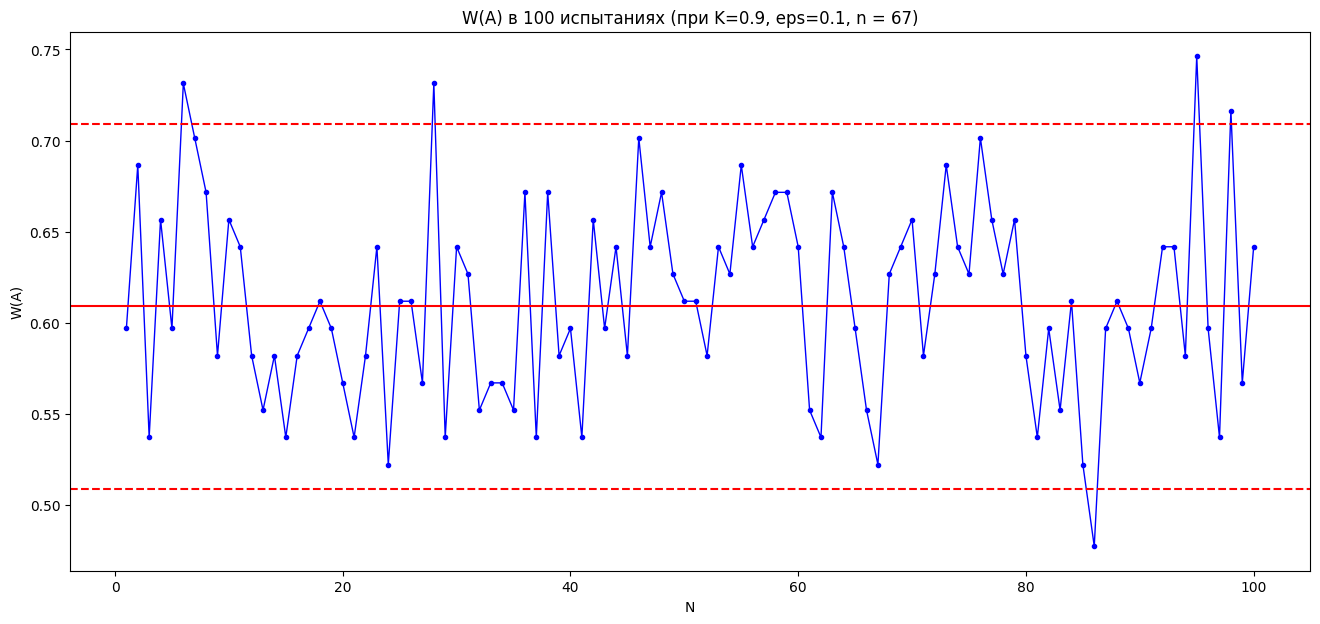

Количество значений, которые попали в диапазон p ± eps: 95


In [35]:
eps = 0.1
K = 0.9

n = int(pow(1/(2*eps) * stats.norm.ppf((K + 1) / 2), 2))
print(f"Полученное количество испытаний = {n}")

tests = []
tests_number = np.arange(1, N+1)
for i in range(N):
    T_values = stats.lognorm.rvs(s=std_norm, scale=np.exp(mean_norm), size=n)
    W_A = np.mean(T_values < 5)
    tests.append(W_A)

p = stats.lognorm.cdf(5, s=std_norm, scale=np.exp(mean_norm))

successful_tests = np.sum((tests >= (p - eps)) & (tests <= (p + eps)))

plt.figure(figsize=[16, 7])
plt.title("W(A) в 100 испытаниях (при K=0.9, eps=0.1, n = 67)")
plt.plot(tests_number, tests, 'b-o', linewidth=1, markersize=3)
plt.xlabel("N")
plt.ylabel("W(A)")
plt.axhline(p, color='red')
plt.axhline(p+eps, ls='--', color='red')
plt.axhline(p-eps, ls='--', color='red')
plt.show()

print(f"Количество значений, которые попали в диапазон p ± eps: {successful_tests}")

Зависимость K от уменьшения eps и n

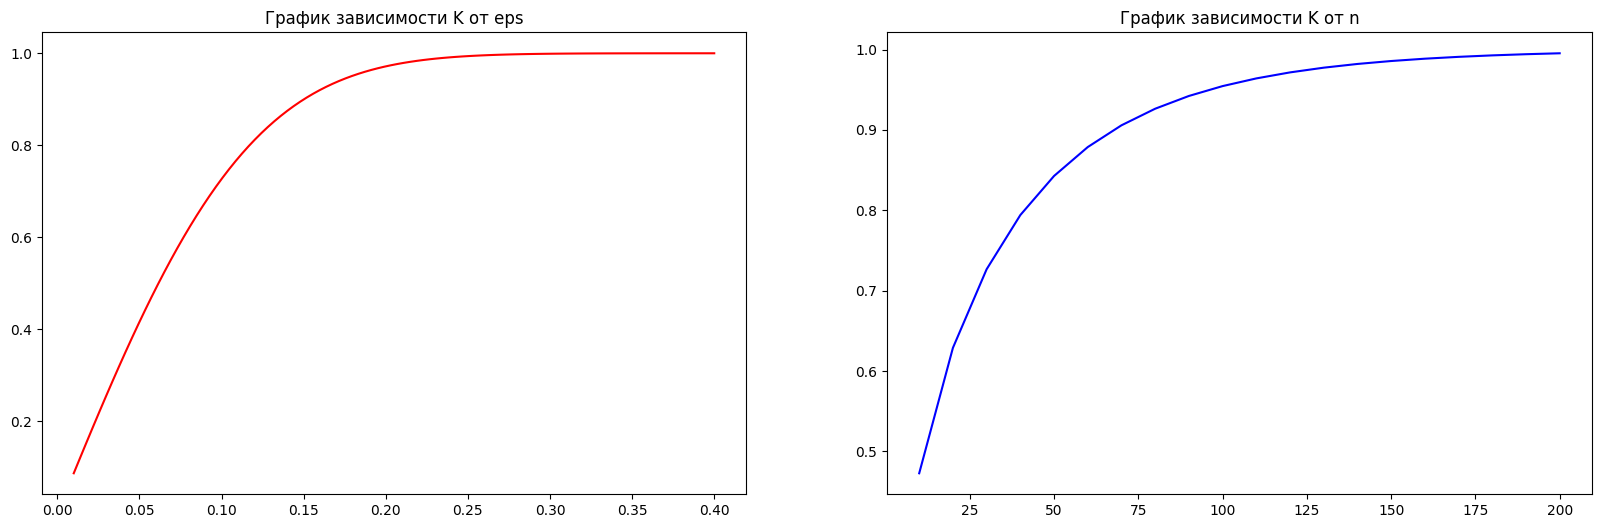

In [36]:
K_array1 = []
K_array2 = []
n_array = []
eps_array = []

eps_fixed = 0.1
n_fixed = 30

eps_array = np.linspace(0.01, 0.4, 100)
for eps in eps_array:
    K = 2 * stats.norm.cdf(2*np.sqrt(n_fixed)*eps) - 1
    K_array1.append(K)

for i in range(10, 201, 10):
    K = 2 * stats.norm.cdf(2*np.sqrt(i)*eps_fixed) - 1
    K_array2.append(K)
    n_array.append(i)

plt.figure(figsize=[20, 6])
plt.subplot(1, 2, 1)
plt.title("График зависимости K от eps")
plt.plot(eps_array, K_array1, 'r')

plt.subplot(1, 2, 2)
plt.title("График зависимости K от n")
plt.plot(n_array, K_array2, 'b')

plt.show()